---
format:
    html:
        embed-resources: true
---

# Visual EDA 

Write either a function, or a class, that performs exploratory data analysis (EDA) on a given CSV file.

Run the function on both of our cleaned CSV files that we created from our job description crawl. 

- Explore feature distributions and relationships
- Uncover trends, patterns, and correlations
- Consider incorporating a geo-spatial analysis where appropriate
  - Folium is a great tool for this: https://realpython.com/python-folium-web-maps-from-data/ 
- Visualize data effectively
- Make sure your results are highly visual with high quality plots.

By focusing on these steps, we'll extract valuable insights and inform deeper analysis of our job descriptions dataset.

### **Univariate Analysis (Single Feature)**
- **Frequency Counts**: For categorical features (e.g., job title, sector, job type), visualize frequency distribution (bar charts).
- **Salary Distribution**: Analyze the range and spread of salary data (histograms, box plots).
- **Job Posting Dates**: Plot distribution of job posting dates to find trends over time (time series plots).
- **Experience Level Distribution**: Explore the spread of entry-level, mid-level, and senior-level roles.
- **Location Distribution**: Map the distribution of jobs across different cities, states, or countries.
- **Job Type Analysis**: Count of job types (full-time, part-time, contract) and their proportions.
- **Job Description Length**: Analyze job description lengths by word or character count.

### **Bivariate Analysis (Two Features)**
- **Salary vs. Experience Level**: Explore how salary varies by experience level (box plot or scatter plot).
- **Salary vs. Job Type**: Analyze differences in salary based on job types (full-time, part-time, contract).
- **Salary vs. Location**: Check how salaries vary across different locations.
- **Job Title vs. Sector/Industry**: Look at the relationship between job titles and the industries they belong to.
- **Job Title vs. Skills/Technologies**: Explore which job titles require specific skills.
- **Company Size vs. Salary**: Compare salaries across different company sizes (small, medium, large).
- **Remote Work vs. Salary**: Analyze if remote jobs offer higher or lower salaries compared to on-site jobs.

### **Multivariate Analysis (Multiple Features)**
- **Experience Level vs. Salary vs. Location**: Analyze how salary and experience vary across locations (3D scatter plot or heatmap).
- **Job Type vs. Experience Level vs. Sector**: Explore trends across job types, experience levels, and sectors (grouped bar plots).
- **Skills vs. Salary vs. Experience**: Check if certain skills demand higher salaries at different experience levels.
- **Salary vs. Sector vs. Company Size**: Compare salary ranges across sectors and company sizes.

### **Text Analysis and Feature Engineering**
- **Keyword Frequency**: Extract and analyze the most common keywords from job descriptions and required skills.
- **Text Length Analysis**: Look at the distribution of text lengths in job descriptions to identify patterns in verbosity.
- **NLP for Job Titles**: Group similar job titles by extracting key terms using Natural Language Processing (e.g., clustering similar roles).
- **Sentiment Analysis**: Perform sentiment analysis on company values or job descriptions to gauge company culture.
- **Named Entity Recognition (NER)**: Extract entities like company names, technologies, and locations from the text data.
- **Topic Modeling**: Identify topics or themes within job descriptions using topic modeling techniques like LDA (Latent Dirichlet Allocation).

### **Date and Time Analysis**
- **Job Posting Frequency Over Time**: Check trends in job postings over time (monthly, weekly).
- **Application Deadline vs. Posting Date**: Analyze how much time is typically given for application submissions.
- **Job Posting Expiry Analysis**: Explore how long jobs remain posted before expiring.
- **Seasonality**: Identify seasonal hiring trends by analyzing the distribution of job postings by month or quarter.

### **Geospatial Analysis**
- **Heatmap of Job Locations**: Visualize job density by location (city, state, country) on a map.
- **Salary by Geographic Region**: Compare average salaries across different geographic regions (e.g., East Coast vs. West Coast).
- **Remote Work Proportion by Location**: Analyze how remote job opportunities vary across regions.

### **Categorical Feature Exploration**
- **Sector/Industry Breakdown**: Analyze the distribution of jobs across different sectors or industries.
- **Certifications Breakdown**: Explore which certifications are most commonly required or preferred.
- **Company Size Distribution**: Look at the distribution of small, medium, and large companies in the dataset.
- **Job Platform Analysis**: Check how job postings differ across various job platforms (e.g., LinkedIn, Indeed).
- **Visa Sponsorship Availability**: Explore how often visa sponsorship is offered across job types or industries.

### **Correlations and Associations**
- **Correlation Matrix**: Compute correlations between numerical features (e.g., salary, years of experience) to find relationships.
- **Crosstab Analysis**: Perform crosstab analysis for categorical features (e.g., job type and location).
- **Feature Importance**: Use machine learning models (e.g., Random Forest) to evaluate feature importance for predicting salary or job title.

### **Clustering and Segmentation**
- **Job Title Clustering**: Cluster similar job titles using text similarity or clustering algorithms (e.g., k-means).
- **Salary Segmentation**: Group job listings into salary tiers (low, medium, high) for further analysis.
- **Geographic Segmentation**: Segment job listings based on location proximity or geographic region.

### **Dimensionality Reduction**
- **PCA**: Perform PCA to reduce the dimensionality of the data and visualize in 2D. 
- **t-SNE**: Perform t-SNE to reduce the dimensionality of the data and visualize in 2D. 

### **Patterns and Trends**
- **Trends in Job Types**: Analyze how the proportions of full-time, part-time, and contract jobs have changed over time.
- **Emerging Technologies**: Track trends in the demand for specific technologies or skills over time.
- **Sector Growth**: Identify growing or shrinking industries based on the number of job postings over time.
- **Benefits and Perks Trends**: Analyze which benefits (e.g., remote work, stock options) are becoming more or less common.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import re

In [ ]:
def perform_eda(csv_file):
    """
    Perform advanced exploratory data analysis on job posting data
    Args:
        csv_file: Path to the CSV file containing job data
    """
    try:
        df = pd.read_csv(csv_file)
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file, encoding='latin-1')
        except:
            df = pd.read_csv(csv_file, encoding='cp1252')
    
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    # 1. Salary Analysis
    def process_salary(salary_str):
        if pd.isna(salary_str):
            return np.nan, np.nan
        # Extract numbers from string
        numbers = re.findall(r'\d+,?\d*', salary_str)
        numbers = [float(n.replace(',', '')) for n in numbers]
        if len(numbers) >= 2:
            return min(numbers), max(numbers)
        elif len(numbers) == 1:
            return numbers[0], numbers[0]
        return np.nan, np.nan

    # Create salary range columns
    df['salary_min'], df['salary_max'] = zip(*df['Salary'].apply(process_salary))
    df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2
    
    # Salary distribution plot
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y='Experience Level', x='salary_avg')
    plt.title('Salary Distribution by Experience Level')
    plt.xlabel('Average Salary (USD)')
    
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, y='Experience Level', x='salary_avg')
    plt.title('Salary Density by Experience Level')
    plt.xlabel('Average Salary (USD)')
    plt.tight_layout()
    plt.show()

    # 2. Experience Level Analysis
    plt.figure(figsize=(15, 6))
    
    # Create a more detailed experience level visualization
    exp_counts = df['Experience Level'].value_counts()
    colors = sns.color_palette("husl", len(exp_counts))
    
    plt.subplot(1, 2, 1)
    exp_counts.plot(kind='bar', color=colors)
    plt.title('Distribution of Experience Levels')
    plt.xlabel('Experience Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add percentage labels
    total = exp_counts.sum()
    for i, v in enumerate(exp_counts):
        plt.text(i, v, f'{(v/total)*100:.1f}%', ha='center', va='bottom')
    
    # Experience level vs job type
    plt.subplot(1, 2, 2)
    exp_job_cross = pd.crosstab(df['Experience Level'], df['Job Type'])
    exp_job_cross.plot(kind='bar', stacked=True)
    plt.title('Experience Level by Job Type')
    plt.xlabel('Experience Level')
    plt.ylabel('Count')
    plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

    # 3. Skills Analysis
    def process_skills(skills_str):
        if pd.isna(skills_str):
            return []
        return [skill.strip().lower() for skill in skills_str.split(',')]

    # Create skills frequency dictionary
    all_skills = []
    for skills in df['Skills/Technologies Required'].dropna():
        all_skills.extend(process_skills(skills))
    
    skill_freq = pd.Series(all_skills).value_counts()
    
    # Create word cloud
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Skills Word Cloud')
    
    # Top skills bar plot
    plt.subplot(1, 2, 2)
    top_skills = skill_freq.head(10)
    sns.barplot(x=top_skills.values, y=top_skills.index)
    plt.title('Top 10 Required Skills')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

    # 4. Location Analysis
    plt.figure(figsize=(15, 8))
    
    # Location distribution
    location_counts = df['Location'].value_counts()
    
    # Create treemap using plotly
    fig = px.treemap(
        names=location_counts.index[:15],
        parents=[""] * len(location_counts[:15]),
        values=location_counts.values[:15],
        title='Top 15 Job Locations (Treemap)'
    )
    fig.show()

    # Location vs Salary
    plt.figure(figsize=(15, 6))
    top_locations = location_counts.head(10).index
    location_salary_data = df[df['Location'].isin(top_locations)]
    
    sns.boxplot(data=location_salary_data, x='Location', y='salary_avg')
    plt.title('Salary Distribution by Top 10 Locations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 5. Company Analysis
    plt.figure(figsize=(15, 6))
    
    # Company size distribution
    company_counts = df['Company Name'].value_counts()
    top_companies = company_counts.head(10)
    
    # Create a bubble chart
    company_data = df[df['Company Name'].isin(top_companies.index)].groupby('Company Name').agg({
        'salary_avg': 'mean',
        'Experience Level': 'count'
    }).reset_index()
    
    fig = px.scatter(
        company_data,
        x='salary_avg',
        y='Experience Level',
        size='Experience Level',
        text='Company Name',
        title='Top Companies: Salary vs Job Postings',
        labels={'salary_avg': 'Average Salary (USD)', 'Experience Level': 'Number of Job Postings'}
    )
    fig.show()

    print("\nDetailed Dataset Statistics:")
    print("-" * 50)
    print(f"Total number of job postings: {len(df):,}")
    print(f"Number of unique companies: {df['Company Name'].nunique():,}")
    print(f"Number of unique locations: {df['Location'].nunique():,}")
    print("\nSalary Statistics:")
    print(f"Average salary range: ${df['salary_min'].mean():,.2f} - ${df['salary_max'].mean():,.2f}")
    print(f"Median salary: ${df['salary_avg'].median():,.2f}")
    
    # Calculate and display correlation matrix
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix of Numeric Features')
        plt.tight_layout()
        plt.show()

    return df

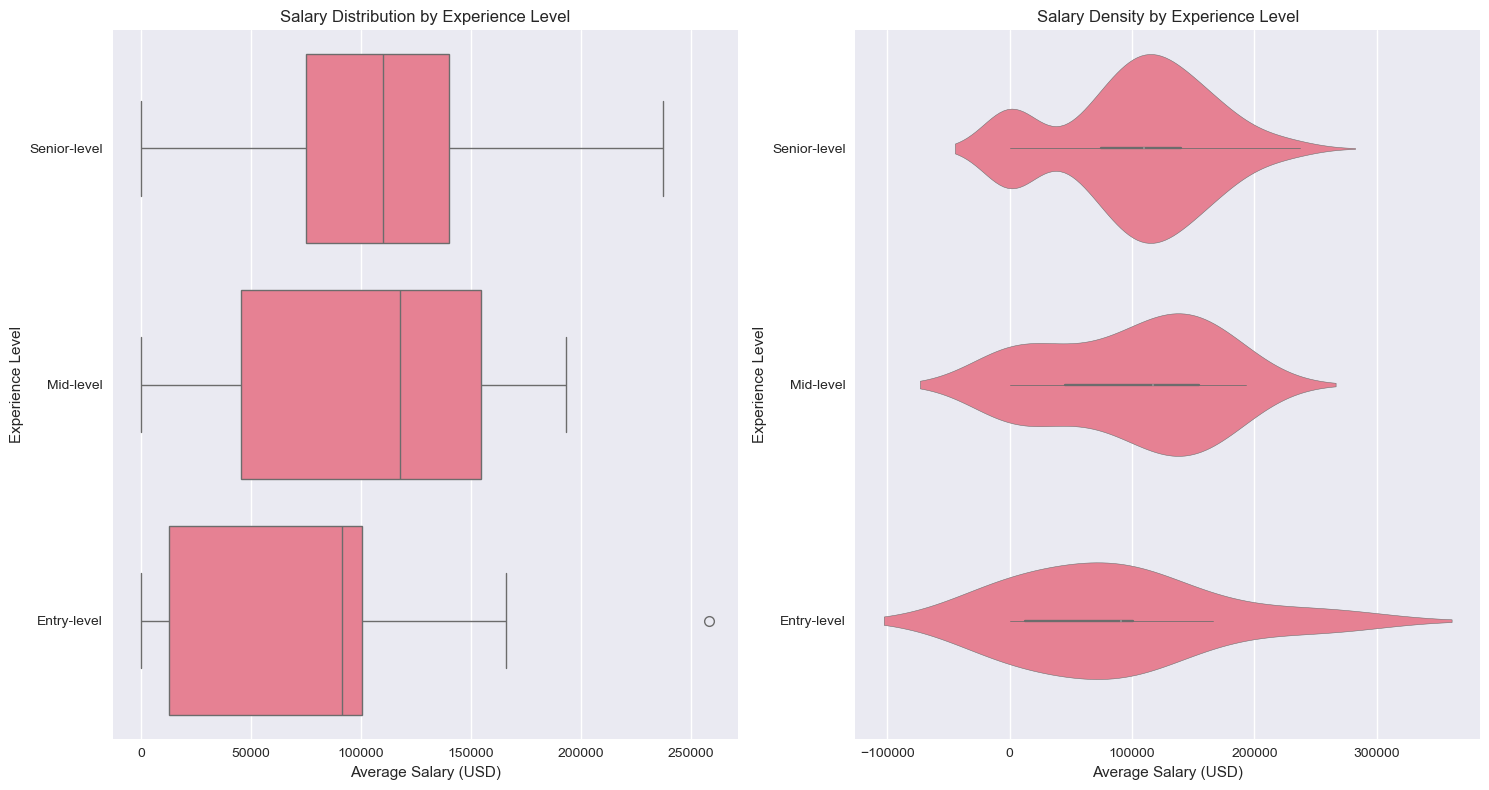

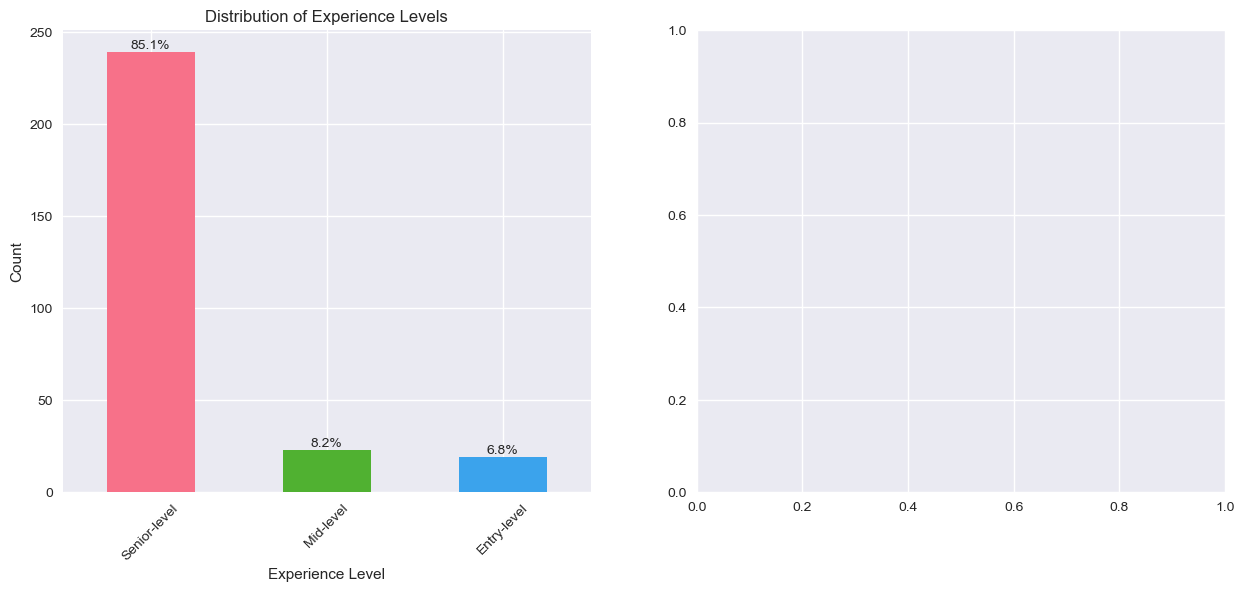

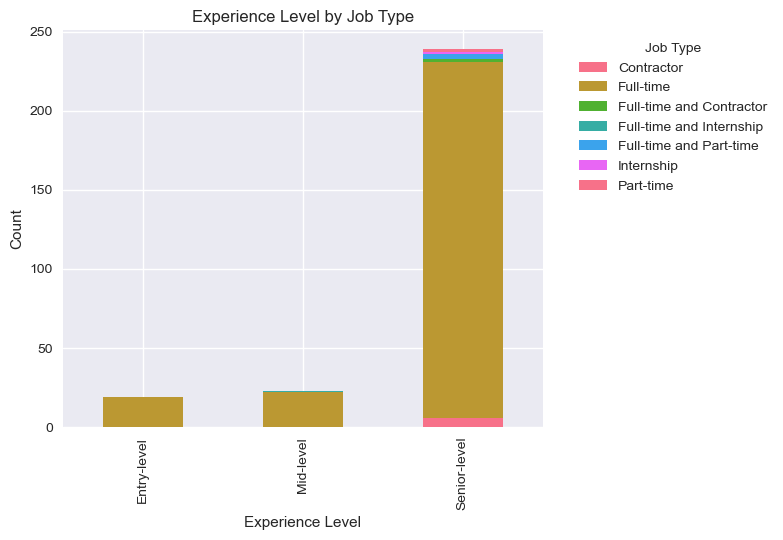

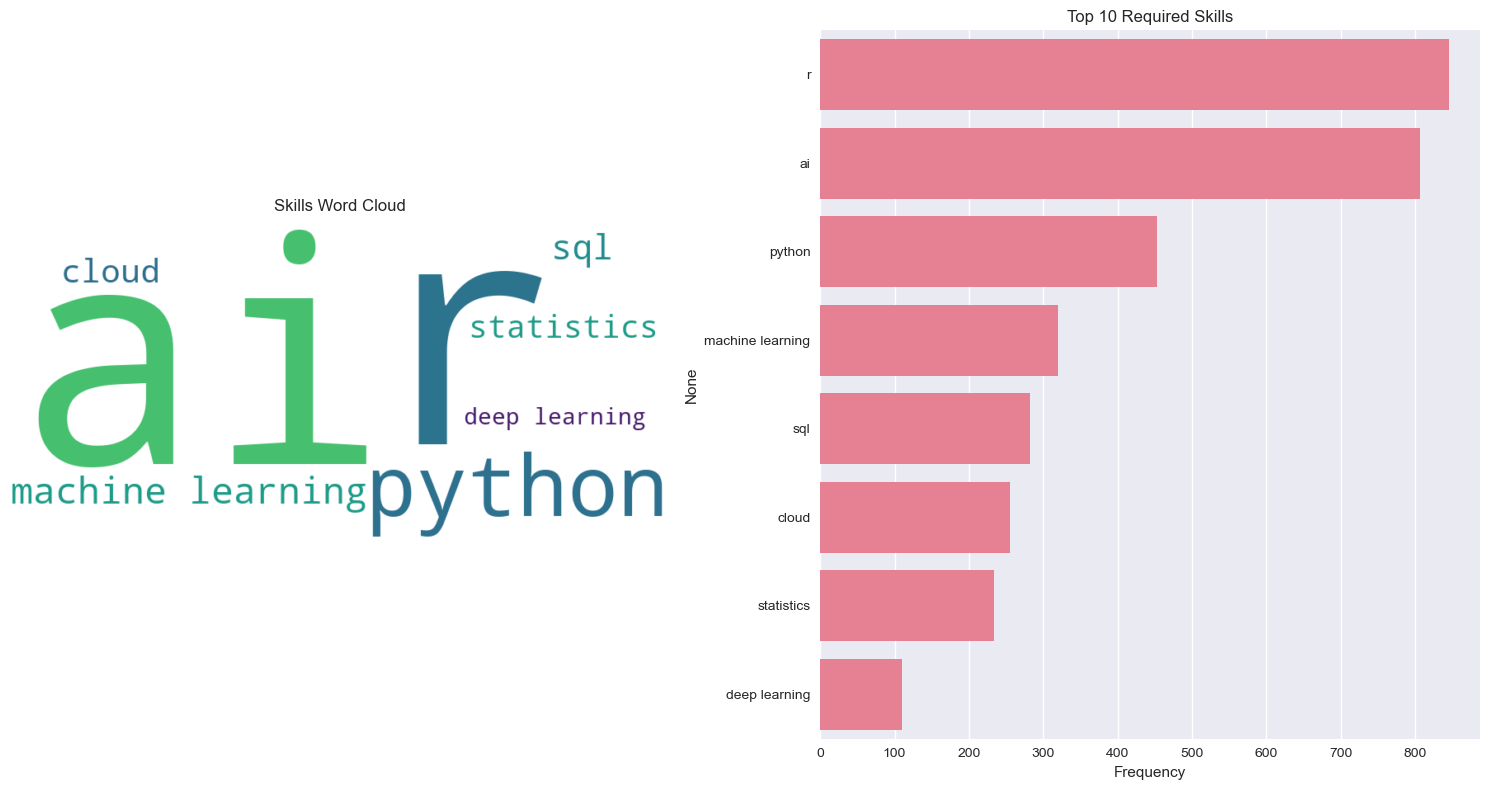

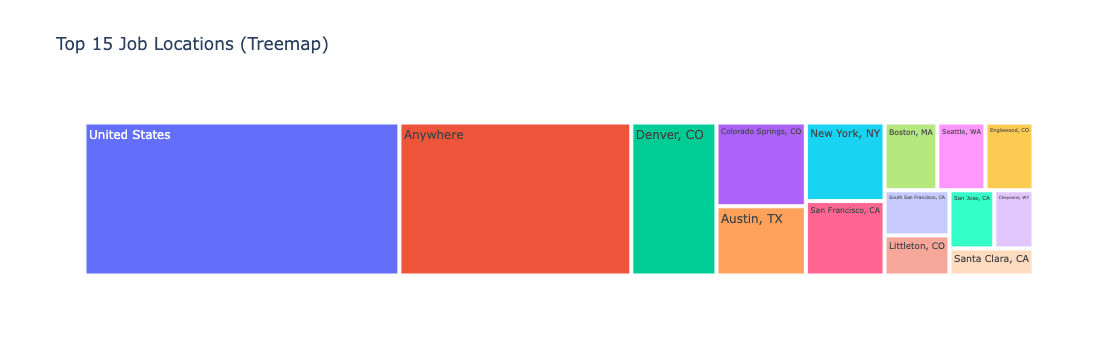

<Figure size 1500x800 with 0 Axes>

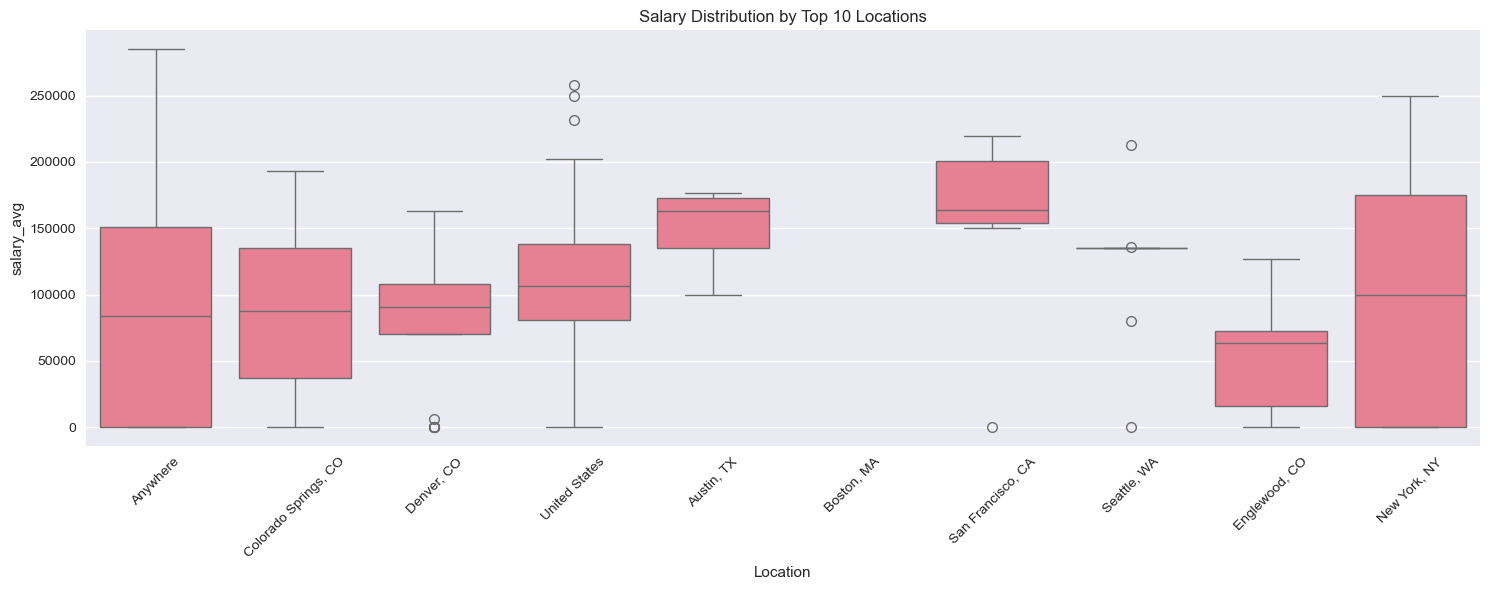

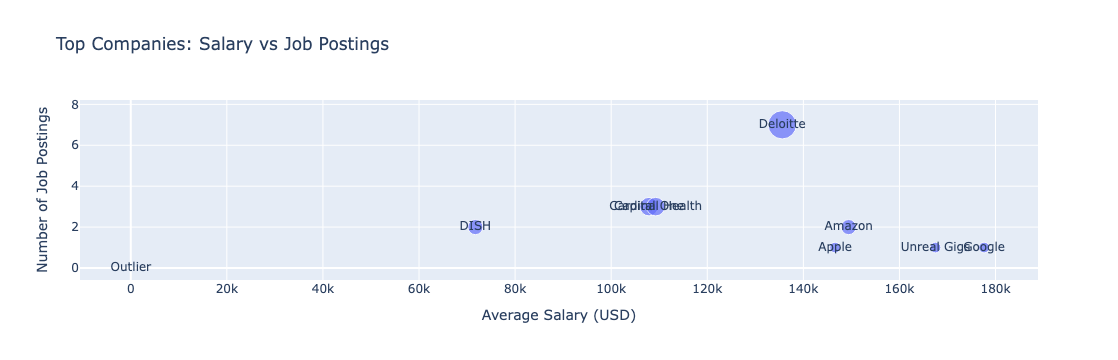


Detailed Dataset Statistics:
--------------------------------------------------
Total number of job postings: 847
Number of unique companies: 627
Number of unique locations: 274

Salary Statistics:
Average salary range: $90,213.52 - $107,153.08
Median salary: $100,000.00


<Figure size 1500x600 with 0 Axes>

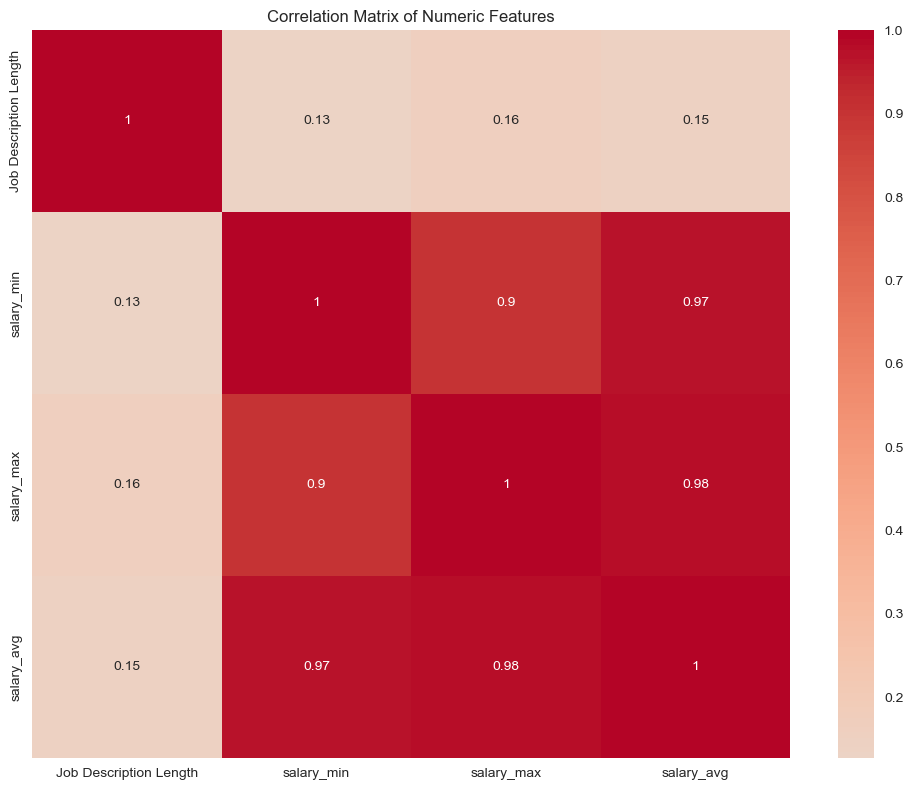

In [ ]:
if __name__ == "__main__":
    csv_file = 'data/processed-jobs-1.csv'
    perform_eda(csv_file)